## Make plots of the distribution of mutations and duplications in the evolved strains

In [1]:
import json
import seaborn as sbn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
with open("../Data/Mutation_data/Strain_to_genes.json") as infile:
    strain_to_genes = json.load(infile)
    
with open("../Data/Mutation_data/All_strains_to_mutations.json") as infile:
    strain_to_mutations = json.load(infile)
    
compound_order = ["HMDA", "PUTR",
                  # "12PD",  # 12PD is left out because all strains except 3 are hypermutators
                  "23BD", "GLUT", "ADIP", "HEXA", "OCTA", "IBUA", "COUM", "BUT"]

In [4]:
mut_df = pd.DataFrame({s: {m: 1 for m in strain_to_mutations[s]} for s in strain_to_genes}).fillna(0)
dup_df = mut_df[mut_df.index.str.startswith("DUP")]
mut_df = mut_df[~mut_df.index.isin(dup_df.index)]

duplication_lengths = dup_df.index.map(lambda x: int(x.split("_")[0][4:].split("-")[1].replace(",", "")))
dup_df = (dup_df.transpose() * duplication_lengths).transpose()

plot_df = pd.DataFrame({"Mutations": mut_df.sum(0), "Duplications": dup_df.sum(0)})
plot_df.index.name = "Strain"
plot_df["Compound"] = plot_df.index.map(lambda x: x.split("-")[0][:-1])
plot_df = plot_df[plot_df["Compound"].isin(compound_order)]
plot_df = plot_df.reindex(sorted(plot_df.index, key=lambda x: compound_order.index(plot_df["Compound"].get(x))))

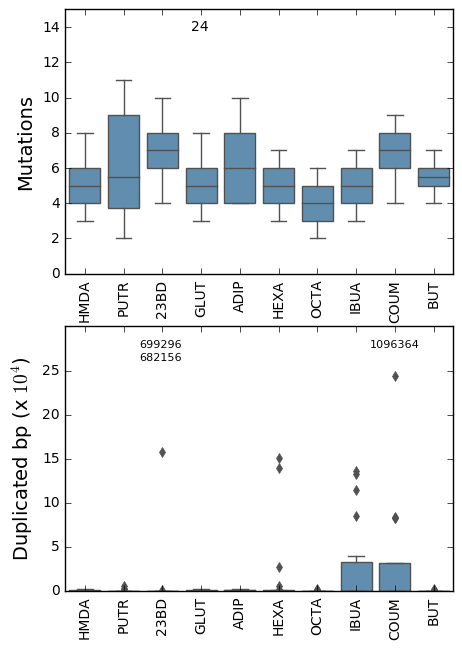

In [5]:
plt.figure(figsize=[5, 7.5])

color = "#5490bb"

plt.subplot(2, 1, 1)
y_max = 15
sbn.boxplot(x="Compound", y="Mutations", data=plot_df, color=color)
plt.xticks(rotation=90)
plt.ylim([0, y_max])
plt.xlabel("")
plt.ylabel("Mutations", fontsize=14)

# Print numbers that are too large to fit in figure
plt.text(3-0.25, 0.92 * y_max, str(int(plot_df["Mutations"]["GLUT7-7"])), size=10)

plt.subplot(2, 1, 2)
y_max = 300000-1
sbn.boxplot(x="Compound", y="Duplications", data=plot_df, color=color)
plt.xticks(rotation=90)
plt.ylim([0, y_max])
plt.xlabel("")

# Print numbers that are too large to fit in figure
plt.text(2-0.59, 0.87 * y_max, str(int(plot_df["Duplications"]["23BD4-4"])), size=8)
plt.text(2-0.59, 0.92 * y_max, str(int(plot_df["Duplications"]["23BD5-1"])), size=8)
plt.text(8-0.65, 0.92 * y_max, str(int(plot_df["Duplications"]["COUM2-3"])), size=8)
plt.ylabel("Duplicated bp (x $10^4$)", fontsize=14)
plt.yticks(range(0, 250001, 50000), ["0", "5", "10", "15", "20", "25"])

plt.savefig("../Plots/Figure 2b - Mutation distributions.pdf", transparent=True)
None